In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from matplotlib import pyplot as plt

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. 

**In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**

- **sex:** 1 for female and 2 for male.
- **age:** of the patient.
- **classification:** covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type:** type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **pneumonia:** whether the patient already have air sacs inflammation or not.
- **pregnancy:** whether the patient is pregnant or not.
- **diabetes:** whether the patient has diabetes or not.
- **copd:** Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- **asthma:** whether the patient has asthma or not.
- **inmsupr:** whether the patient is immunosuppressed or not.
- **hypertension:** whether the patient has hypertension or not.
- **cardiovascular:** whether the patient has heart or blood vessels related disease.
- **renal chronic:** whether the patient has chronic renal disease or not.
- **other disease:** whether the patient has other disease or not.
- **obesity:** whether the patient is obese or not.
- **tobacco:** whether the patient is a tobacco user.
- **usmr:** Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit:** type of institution of the National Health System that provided the care.
- **intubed:** whether the patient was connected to the ventilator.
- **icu:** Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died:** If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [3]:
#import data
data = pd.read_csv('Covid Data.csv')

#having a first look at the data
data.head()
data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
#having a look at the columns names
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [5]:
#lets describe the 'age' column
round(data['AGE'].describe())

count    1048575.0
mean          42.0
std           17.0
min            0.0
25%           30.0
50%           40.0
75%           53.0
max          121.0
Name: AGE, dtype: float64

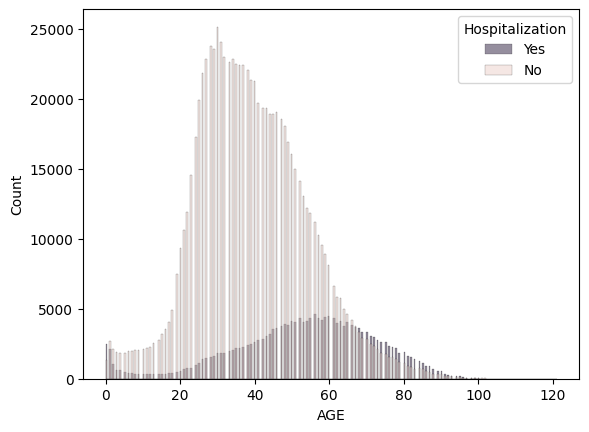

In [6]:
#lets see if there is a relationship between age and covid-19 hospitalization

#patients diagnosed with COVID without the necessity of hospitalization

#data distribution

p_type = sns.histplot(data = data, x='AGE', hue = 'PATIENT_TYPE') 
plt.legend(title='Hospitalization', loc='upper right', labels=['Yes', 'No'])
plt.show(p_type)

In this dataset, we have more not-hospitalized people than hospitalized ones. The hospitalizations occurs predominantly in elderly people (age >= 60). Infants also looks like a risk-group for COVID-19 because nearly 100% of then (age closer to 0) also were hospitalized.

In [7]:
#lets see how hospitalization and deaths correlates with age; 
#first lets stablish a binary way of identify if the patient died; 
#following the boolean code of the already existing features, lts stablish 1 for patients who died and 2 for patient who didn't die

data_transformed = data
data_transformed.loc[data_transformed['DATE_DIED'] =='9999-99-99', 'DIED'] = "No"
data_transformed.loc[data_transformed['DATE_DIED'] !='9999-99-99', 'DIED'] = "Yes"

#verify if the column was correctly created
data_transformed[['DATE_DIED', 'DIED']].head(10)


,DATE_DIED,DIED
0,03/05/2020,Yes
1,03/06/2020,Yes
2,09/06/2020,Yes
3,12/06/2020,Yes
4,21/06/2020,Yes
5,9999-99-99,No
6,9999-99-99,No
7,9999-99-99,No
8,9999-99-99,No
9,9999-99-99,No


In [8]:
#lets also clarify the patient type
data_transformed.loc[data_transformed['PATIENT_TYPE'] ==2, 'HOSPITALIZED'] = "Yes"
data_transformed.loc[data_transformed['PATIENT_TYPE'] ==1, 'HOSPITALIZED'] = "No"

#verify if the column was correctly created
data_transformed[['PATIENT_TYPE', 'HOSPITALIZED']].head(10)

,PATIENT_TYPE,HOSPITALIZED
0,1,No
1,1,No
2,2,Yes
3,1,No
4,1,No
5,2,Yes
6,1,No
7,1,No
8,2,Yes
9,2,Yes


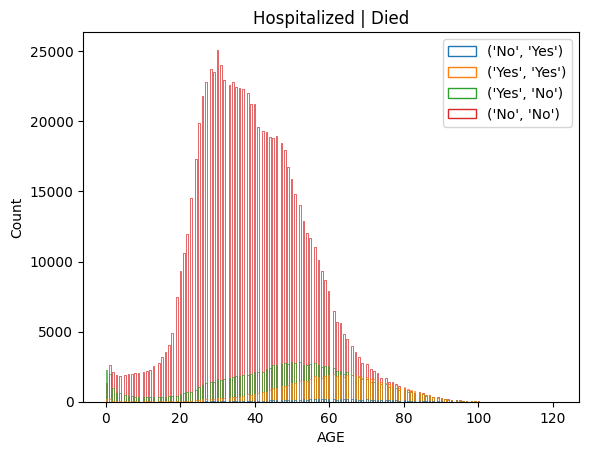

In [9]:
d = sns.histplot(data=data_transformed, x='AGE', hue=data_transformed[['HOSPITALIZED', 'DIED']].apply(tuple, axis=1),fill=False) 
d.set(title='Hospitalized | Died')
plt.show(d)

Its possible to note that for ages < 80 years the majority of people were not hospitalized and did not died. We also can see that infants were largely hospitalized, but the death of COVID-19 is a rare event for this age. Although, after the 40's, the number of hospitalization and the number of deaths increases. After the 60's, nearly all the hospitalized people died, reinforcing the age as a important risk-factor of severe COVID-19. There is a quantity of people that died without being hospitalized. This number is small when compared with the other proportions but is also more prevalent in patients with age > 40 years.


In [10]:
#lets see how the genre relates to age and covid-19 death

#see how many males and females we have in the dataset
n_females = data['SEX'].loc[(data.SEX == 1)].count()
n_males = data['SEX'].loc[(data.SEX == 2)].count()
print('n_females: ', n_females, 'n_males :', n_males, 'abs_diff: ', abs(n_females-n_males))

n_females:  525064 n_males : 523511 abs_diff:  1553


We can see we have more females than males, but the difference is not so large so we propably don't have a significant bias on this variable

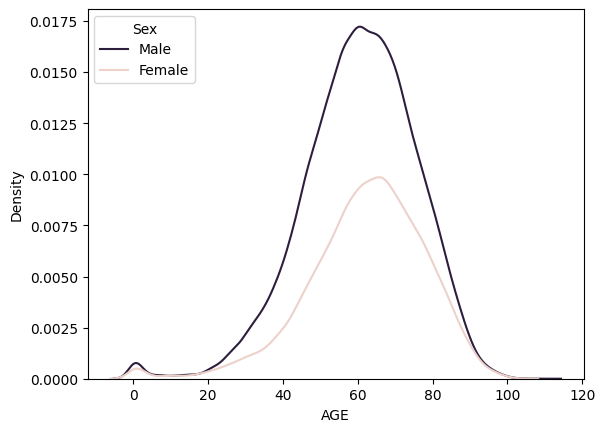

In [11]:
#lets see how the genre relates to age and covid-19 death
hospitalized_and_death = data.loc[(data.PATIENT_TYPE == 2) & (data.DATE_DIED != '9999-99-99')]

g = sns.kdeplot(data=hospitalized_and_death, x='AGE', hue='SEX')
plt.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])
plt.show(g)

We can see that although we have more females in the dataset, the majority of deaths of hospitalized patients are from males. This could indicate a correlation between genre and COVID-19 severity. Althought, after the age 0, this tendency is not seen until the age 20, indicating that the genre have less impact in the clinical outcome of this age group.

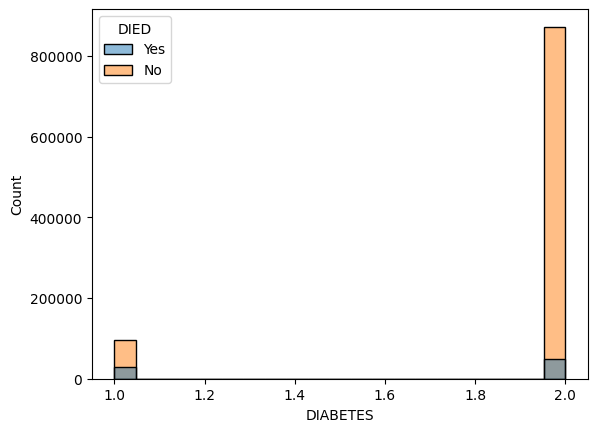

In [12]:
#clean null data from diabetes columns
data_transformed = data_transformed.loc[(data_transformed.DIABETES != 98)]
d = sns.histplot(data=data_transformed, x='DIABETES', hue='DIED')
plt.show(d)

There is a lote more individuals without diabetes than diabetic individuals in the dataset, but the number of deaths between the two categories looks very closer to each other. Let's analyze it.

In [13]:
n_diabetic_individuals = data_transformed['DIABETES'].loc[(data_transformed.DIABETES == 1)].count()
n_diabetic_individuals_died = data_transformed['DIABETES'].loc[(data_transformed.DIABETES == 1) &(data_transformed.DIED == 'Yes')].count()

n_non_diabetic_individuals = data_transformed['DIABETES'].loc[(data_transformed.DIABETES == 2)].count()
n_non_diabetic_individuals_died = data_transformed['DIABETES'].loc[(data_transformed.DIABETES == 2) &(data_transformed.DIED == 'Yes')].count()

percentage_diabetics_deaths = (n_diabetic_individuals_died/n_diabetic_individuals)*100
percentage_non_diabetics_deaths = (n_non_diabetic_individuals_died/n_non_diabetic_individuals)*100
print('percentage of death in the diabetic group: ', round(percentage_diabetics_deaths),'% | ', 'percentage of death in the non-diabetic group: ', round(percentage_non_diabetics_deaths),'%')

percentage of death in the diabetic group:  23 % |  percentage of death in the non-diabetic group:  5 %


As we can see, the death in the diabetic group is more than 4 times more common than the death in the non-diabetic group, suggesting that diabetes is a important risk-factor of a poor clinical outcome of COVID-19 infection. This is according with the existing literature about the theme: *Kumar, A., Arora, A., Sharma, P., Anikhindi, S. A., Bansal, N., Singla, V., Khare, S., & Srivastava, A. (2020). Is diabetes mellitus associated with mortality and severity of COVID-19? A meta-analysis. Diabetes & metabolic syndrome, 14(4), 535–545. https://doi.org/10.1016/j.dsx.2020.04.044*

However, it is important to say that there could be a bias due to the number of individuals of each category.